In [53]:
from mqt.bench import get_benchmark
from qiskit import QuantumCircuit, Aer, execute, assemble
from qiskit.providers.fake_provider import FakeSherbrooke
from qiskit.compiler import transpile
from qiskit.visualization import plot_gate_map
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np
import time
import os

def runtime_benchmarking(NUM_ITERATIONS, circuits):
    
    BACKEND = FakeSherbrooke()  
    Optimization_Levels = {3: [], 2: [], 1: [], 0: []}
    
    #These array will store:   
    mean_transpile_times_1 = [] 
    mean_transpile_times_2 = []
    mean_transpile_times_3 = []
    
    counter = 0
    for circuit in circuits:
        
        transpiled = False
                
        iteration_times_1 = [] 
        iteration_times_2 = []
        iteration_times_3 = []
            
        for _ in range(NUM_ITERATIONS):
                
            #Transpilation Level 1:
            start_time = time.perf_counter()
            qc1 = transpile(circuit, optimization_level= 1, seed_transpiler= 42, backend=BACKEND)
            stop_time = time.perf_counter()
            iteration_times_1.append(stop_time - start_time) 
            
            #Transpilation Level 2:
            start_time = time.perf_counter()
            qc2 = transpile(circuit, optimization_level= 2, seed_transpiler= 42, backend=BACKEND)
            stop_time = time.perf_counter()
            iteration_times_2.append(stop_time - start_time) #stores in temp array five values
                
            #Transpilation Level 3:
            start_time = time.perf_counter()
            qc3 = transpile(circuit, optimization_level= 3, seed_transpiler= 42, backend=BACKEND)
            stop_time = time.perf_counter()
            iteration_times_3.append(stop_time - start_time) #stores in temp array five values
            
            #If this is the first iteration, then we simply add the circuits to the dictonary
            if transpiled == False:
                
                Optimization_Levels[3].append(qc3)
                Optimization_Levels[2].append(qc2)
                Optimization_Levels[1].append(qc1)
                Optimization_Levels[0].append(circuit)
                transpiled = True
                
        #At this point all the data has been added to iteration_times. Now it is just a matter of extracting data. 
        mean_transpile_times_1.append(mean(iteration_times_1))
        mean_transpile_times_2.append(mean(iteration_times_2))
        mean_transpile_times_3.append(mean(iteration_times_3))
        
        print("Circuit Index Completed: ", counter)
        counter += 1
            
    #Scatter Plot for Runtime after all values are collected
    plt.figure(figsize=(12, 6))

    #Number of qubits in the sorted circuit
    number_of_qubits = [i + 2 for i in range(len(mean_transpile_times_1))] #num of qubits 
    
    x = np.array(number_of_qubits)

    #Calculating Line of BEST FIT: Optimization Level 1
    a, b = np.polyfit(x, np.array(mean_transpile_times_1), 1)
    #Calculating Line of BEST FIT: Optimization Level 2
    c, d = np.polyfit(x, np.array(mean_transpile_times_2), 1)
    #Calculating Line of BEST Fit: Optimization Level 3
    e, f = np.polyfit(x, np.array(mean_transpile_times_3), 1)


    plt.scatter(number_of_qubits, mean_transpile_times_1, label = "Average of Opt Level 1")
    plt.plot(x, a*x+b)
    plt.scatter(number_of_qubits, mean_transpile_times_2, label = "Average of Opt Level 2")
    plt.plot(x, c*x+d)
    plt.scatter(number_of_qubits, mean_transpile_times_3, label = "Average of Opt Level 3")
    plt.plot(x, e*x+f)
    plt.xlabel('Number of Qubits')
    plt.ylabel('Runtime in Seconds')
    plt.title('Runtime in Seconds (at each opt level)')
    plt.legend()
    plt.show()
    
    return Optimization_Levels

In [54]:
def sort_circuit(circuits):
    for i in range(len(circuits)):
        min_qubits = circuits[i].num_qubits
        for j in range(len(circuits)):
            temp_qubits = circuits[j].num_qubits
            if min_qubits < temp_qubits:
                min_qubits = temp_qubits
                qc = circuits[i]
                circuits[i] = circuits[j]
                circuits[j] = qc

def file_reader(file_path):
    circuits = []
    optimization_level= {3: [],2: [], 1: [], 0: []}
    directory = file_path
    for circuit in os.listdir(directory):
        circuit_path = f"{file_path}/{circuit}"
        if(circuit_path.endswith('.qasm')):
            print(circuit_path)
            qc = QuantumCircuit.from_qasm_file(circuit_path)
            circuits.append(qc)
            
    #Sorts Circuits Before Transpiling:
    sort_circuit(circuits)
    return circuits

In [55]:
circuits = file_reader("/Users/noelnegron/Desktop/Demo")

/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_10.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_3.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_2.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_11.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_16.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_5.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_9.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_20.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_21.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_8.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_4.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_17.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_7.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_14.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_18.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_19.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_15.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_6.qasm
/Users/noelnegron/

/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Circuit Index Completed:  0
Circuit Index Completed:  1
Circuit Index Completed:  2


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  3


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  4


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  5


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  6


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  7


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  8


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  9


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  10


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  11


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  12


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  13


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  14


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  15


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  16


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  17


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  18


/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.11/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, sign

Circuit Index Completed:  19


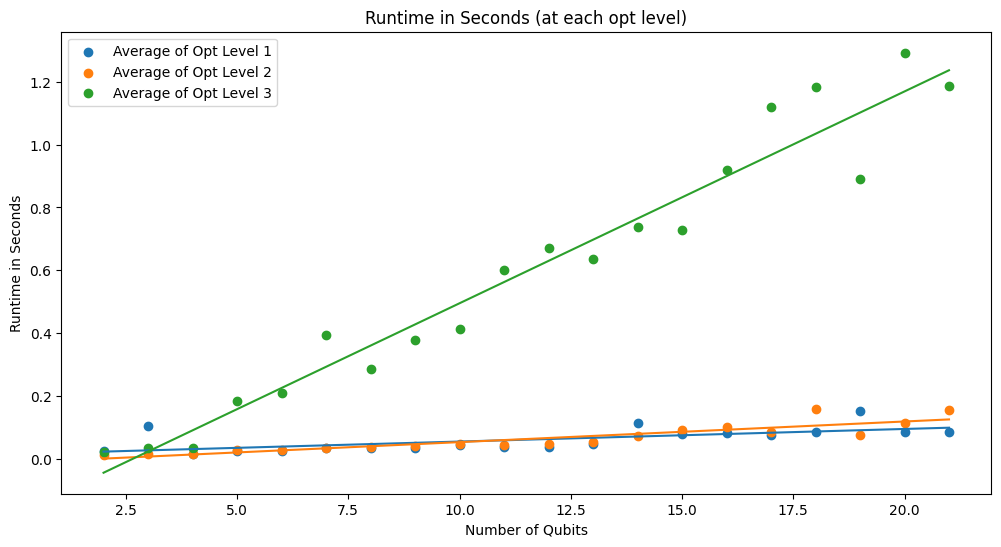

In [56]:
Optmization_levels = runtime_benchmarking(3, circuits)

In [57]:
def gate_count(optimization_levels):
    # Transpile each circuit, count the gates, and store the results
    opt1 = []
    opt2 = []
    opt3 = []
    for i in range(len(optimization_levels[1])):
        # counts the number of gates in a given circuit
        opt1_count = optimization_levels[1][i].count_ops()
        opt2_count = optimization_levels[2][i].count_ops()
        opt3_count = optimization_levels[3][i].count_ops()

        # appends our count of the transpiled circuit to the array
        opt1.append(sum(opt1_count.values()))
        opt2.append(sum(opt2_count.values()))
        opt3.append(sum(opt3_count.values()))

    # Generate a graph to visualize the gate counts for optimization level 1
    plt.plot(range(1, len(optimization_levels[1]) + 1), opt1, label = "Optimization Level 1")
    plt.plot(range(1, len(optimization_levels[2]) + 1), opt2, label = "Optimization Level 2")
    plt.plot(range(1, len(optimization_levels[3]) + 1), opt3, label = "Optimization Level 3")
    plt.xlabel('Circuit')
    plt.ylabel('Gate Count')
    plt.title('Gate Count of Transpiled Circuits')
    plt.xticks(range(1, len(optimization_levels[1]) + 1))
    plt.legend()
    plt.show()

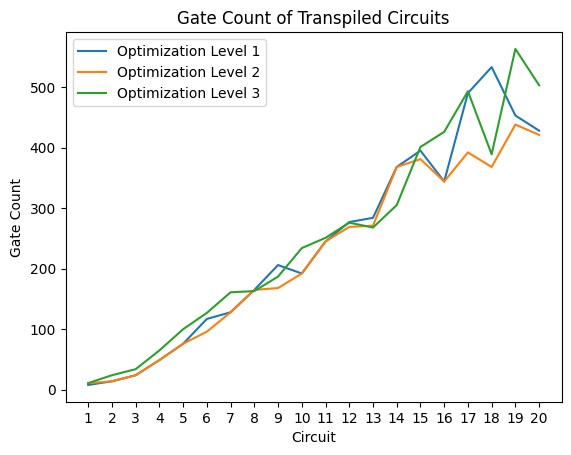

In [58]:
gate_count(Optmization_levels)

In [59]:
def num_single_and_multi_qubit_gates(circuit):
    Map = {'single' : 0, "multi" : 0}
    for gate in circuit.data:
        if len(gate[1]) == 1:
            Map['single'] = Map['single'] + 1
        else:
            Map['multi'] = Map['multi'] + 1
    return Map

def single_multi_ratio_benchmarking(optimization_levels):
     #These list will store the ratios (single // Multi ) of each circuit
    level1_list = []
    level2_list = []
    level3_list = []    
    return_list = []
    
    for i in range(len(optimization_levels[1])):
        
        level1_data = num_single_and_multi_qubit_gates(optimization_levels[1][i])
        level2_data = num_single_and_multi_qubit_gates(optimization_levels[2][i])
        level3_data = num_single_and_multi_qubit_gates(optimization_levels[3][i])
        
        #Step 3: Prepare ratio and list that contains all the data
        if level1_data['multi'] > 0:
            level1_ratio = level1_data['single'] / level1_data['multi']
            level1_list.append(level1_ratio)
        else:
            level1_list.append(level1_data['single'])
            
        if level2_data['multi'] > 0:
            level2_ratio = level2_data['single'] / level2_data['multi']
            level2_list.append(level2_ratio)
        else:
            level2_list.append(level1_data['single'])
            
        if level3_data['multi'] > 0:
            level3_ratio = level3_data['single'] / level3_data['multi']
            level3_list.append(level3_ratio)
        else:
            level3_list.append(level1_data['single'])
    
        
    return_list.append(level1_list), return_list.append(level2_list), return_list.append(level3_list)
    number_of_qubits= [i + 2 for i in range(len(optimization_levels[1]))]
    
    x = np.array(number_of_qubits)
    
    #Calculating Line of BEST FIT: Optimization Level 1
    a, b = np.polyfit(x, np.array(level1_list), 1)
    #Calculating Line of BEST FIT: Optimization Level 2
    c, d = np.polyfit(x, np.array(level2_list), 1)
    #Calculating Line of BEST Fit: Optimization Lebel 3
    e, f = np.polyfit(x, np.array(level3_list), 1)
    
    #--> Optimization Level 1.. etc lols
    plt.scatter(number_of_qubits, level1_list , label = "Optimization Level 1")    
    plt.plot(x, a*x+b) 
    print("The rate of change for optimization Level 1 is: ", a)
    print("The y-intercept for optimization level 1 is: ", b)
    plt.scatter(number_of_qubits, level2_list, label = "Optimization Level 2")
    plt.plot(x, c*x+d)  
    print("The rate of change for optimization level 2 is: ", c)
    print("The y-intercept for optimization level 2 is: ", d)
    plt.scatter(number_of_qubits, level3_list, label = "Optimization Level 3")
    print("The rate of change for optimization level 3 is: ", e)
    print("The y-intercept for optimization level 3 is: ", f)
    plt.plot(x, e*x+f)  
    plt.title("Transpilation Single Qubit to Multi Qubit gates")
    plt.xlabel('Number of Qubits')
    plt.ylabel('Ratio: (Single | Multi)' )
    plt.legend()
    plt.show()  

The rate of change for optimization Level 1 is:  0.04640225569934
The y-intercept for optimization level 1 is:  4.426428620488253
The rate of change for optimization level 2 is:  0.022526323687443478
The y-intercept for optimization level 2 is:  4.759834216014254
The rate of change for optimization level 3 is:  0.03158238103203931
The y-intercept for optimization level 3 is:  6.592633813981685


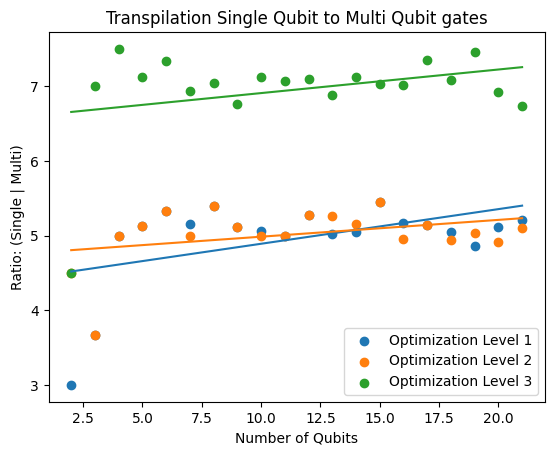

In [60]:
single_multi_ratio_benchmarking(Optmization_levels)